#  Interactions at baits

In this Jupyter notebook, the classes ``BaitedDigest`` and ``BaitedDigestSet`` are demonstrated.

The class ``BaitedDigest`` can be used to group interactions according to the baits in which they end. Within this class, interactions are further differntiated according to interaction category (``DI``, ``UIR``, ``UI`` and ``ALL``) and the enrichment status of the two digests (``NE`` and ``EN``). Interactions with the enrichment state `NN` or ``EE`` cannot be assigned unabgiuously to a baited digests and, therefore, are not taken into account. However, for capture Hi-C data, such interactions make up only a small percentage (around 10% on average).

The class ``BaitedDigestSet`` can be used to manage a number of ``BaitedDigest`` objects. At its core, it is a dictionary in which ``BaitedDigest`` objects are stored, with the coordinates of the digests serving as keys.

This structuring of the data enables properties of interactions that end in the same baited digest to be investigated and compared for the different interaction categories and enrichment states.

## Setting up the notebook

In [1]:
import sys
import os
import pandas
sys.path.append("..")
from diachr import DiachromaticInteractionSet
from diachr import BaitedDigest
from diachr import BaitedDigestSet

## Input file

We have prepared a small test file in ``Diachromatic11`` format (already contains the  interaction categories ``DI``, ``UIR`` and ``UI``) that only contains interactions on chromosome ``chr21`` and ``chr22``.

In [15]:
# Interactions on 'chr21' and 'chr22' only
INTERACTION_FILE = "../tests/data/baited_digests_d11_interaction_test_file.tsv.gz"
OUT_PREFIX = "TEST_FILE"

# 100,000 randomly selected interactions
#INTERACTION_FILE = "../tests/data/baited_digests_d11_interaction_test_file_2.tsv.gz"

# Real data without shuffling
#INTERACTION_FILE = "../stair_like_structure_minimal/JAV_MAC_M1_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"

# Interactions on all chromosomes
#INTERACTION_FILE = "../DICer_interactions/JAV_MK_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_ERY_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_NEU_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_MON_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_MAC_M0_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_MAC_M1_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_MAC_M2_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_EP_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_NB_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_TB_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_FOET_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_NCD4_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_TCD4_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_NACD4_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_ACD4_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_NCD8_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_TCD8_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"

#INTERACTION_FILE = "../ESTC/dicer/JAV_MK_RALT_HTR_000001_evaluated_and_categorized_interactions.tsv.gz"
#OUT_PREFIX = "JAV_MK_RALT_HTR_000001"

#INTERACTION_FILE = "../ESTC/dicer/JAV_MK_RALT_HTR_0001_evaluated_and_categorized_interactions.tsv.gz"
#OUT_PREFIX = "JAV_MK_RALT_HTR_0001"

#INTERACTION_FILE = "../ESTC/dicer/JAV_MK_RALT_HTR_025_evaluated_and_categorized_interactions.tsv.gz"
#OUT_PREFIX = "JAV_MK_RALT_HTR_025"


INTERACTION_FILE = "../DICer_interactions/HT/JAV_MK_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"

## Creation of a ``BaitedDigestSet``

First, we create a ``DiachromaticInteractionSet`` from the test file.

In [16]:
d11_interaction_set = DiachromaticInteractionSet(rpc_rule='ht')
d11_interaction_set.parse_file(i_file=INTERACTION_FILE, verbose=True)

[INFO] Parsing Diachromatic interaction file ...
	[INFO] ../DICer_interactions/HT/JAV_MK_RALT_20000_evaluated_and_categorized_interactions.tsv.gz
	[INFO] Parsed 1,000,000 interaction lines ...
	[INFO] Parsed 2,000,000 interaction lines ...
	[INFO] Parsed 3,000,000 interaction lines ...
	[INFO] Parsed 4,000,000 interaction lines ...
	[INFO] Parsed 5,000,000 interaction lines ...
	[INFO] Parsed 6,000,000 interaction lines ...
	[INFO] Parsed 7,000,000 interaction lines ...
	[INFO] Set size: 7,559,329
[INFO] ... done.


Optionally, interactions with digest pairs that are extreme in terms of length can be removed.

In [17]:
interaction_removed = d11_interaction_set.remove_digest_length_outliers(dg_min_len = 500, dg_max_len = 10000, dg_min_len_q = 0.25, verbose =  True)

[INFO] Removing interactions with extreme digest lengths ...
	[INFO] Processed 1,000,000 interactions ...
	[INFO] Processed 2,000,000 interactions ...
	[INFO] Processed 3,000,000 interactions ...
	[INFO] Processed 4,000,000 interactions ...
	[INFO] Processed 5,000,000 interactions ...
	[INFO] Processed 6,000,000 interactions ...
	[INFO] Processed 7,000,000 interactions ...
	[INFO] Total number of interactions removed: 3,759,773
	[INFO] Remaining interactions: 3,799,556
[INFO] ... done.


Optionally, interactions with extreme read pair counts can be removed. All interactions in which one of the four read pair counts makes up more than 75% will be removed.

In [39]:
#interactions_removed = d11_interaction_set.remove_read_pair_count_outliers(prop_thresh = 0.90, verbose =  True)

Then we shuffle the interactions and re-select undirected reference interactions (due to sorting artifact).

In [18]:
#d11_interaction_set.shuffle_inter_dict(
#    random_seed = 1,
#    verbose = True)
report_dict = d11_interaction_set.evaluate_and_categorize_interactions(pval_thresh=0.000001)
report_dict = d11_interaction_set.select_reference_interactions_2(verbose=True)

/Users/hansep/anaconda2/envs/diachscripts_p37env/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:915: RuntimeWarning: divide by zero encountered in log
  return log(self._cdf(x, *args))
/Users/hansep/anaconda2/envs/diachscripts_p37env/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:915: RuntimeWarning: divide by zero encountered in log
  return log(self._cdf(x, *args))
/Users/hansep/anaconda2/envs/diachscripts_p37env/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:915: RuntimeWarning: divide by zero encountered in log
  return log(self._cdf(x, *args))
/Users/hansep/anaconda2/envs/diachscripts_p37env/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:915: RuntimeWarning: divide by zero encountered in log
  return log(self._cdf(x, *args))
/Users/hansep/anaconda2/envs/diachscripts_p37env/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:915: RuntimeWarning: divide by zero encountered in log
  return log(self._

[INFO] Select reference interactions ...
	[INFO] Treating NE and EN as one category ...
	[INFO] First pass: Count directed interactions for different read pair counts ...
	[INFO] Second pass: Select undirected reference interactions for different read pair counts ...
[INFO] ... done.


Next, we create a ``BaitedDigestSet`` and pass the ``DiachromaticInteractionSet``.

In [19]:
baited_digest_set = BaitedDigestSet()
read_interactions_info_dict = baited_digest_set.ingest_interaction_set(d11_interaction_set, verbose=True)

[INFO] Reading interactions and group them according to chromosomes and baited digests ...
	[INFO] Read 1,000,000 interactions ...
	[INFO] Total number of interactions read: 1,307,473
	[INFO] Total number of baited digests: 14,930
[INFO] ... done.


The function ``get_ingest_interaction_set_info_report()`` returns a string with more detailed information on the ingestion.

In [20]:
print(baited_digest_set.get_ingest_interaction_set_info_report())

[INFO] Report on ingestion of interactions:
	[INFO] Total number of interactions read: 1,307,473
	[INFO] Discarded NN and EE interactions: 63,548
	[INFO] Total number of ingested NE and EN interactions: 1,243,925
	[INFO] Broken down by interaction category and enrichment status: 
		[INFO] DI: 
			[INFO] NE: 188,320
			[INFO] EN: 189,653
		[INFO] UIR: 
			[INFO] NE: 181,973
			[INFO] EN: 181,920
		[INFO] UI: 
			[INFO] NE: 250,481
			[INFO] EN: 251,578
		[INFO] ALL: 
			[INFO] NE: 620,774
			[INFO] EN: 623,151
	[INFO] Total number of baited digests: 14,930
[INFO] End of report.



And the function ``get_ingest_interaction_set_table_row()`` returns the same information in table format.

In [9]:
print(baited_digest_set.get_ingest_interaction_set_table_row())

:TR_INGESTION:	TOTAL_INTERACTIONS_READ	DISCARDED	INGESTED	DI_NE	DI_EN	UIR_NE	UIR_EN	UI_NE	UI_EN	ALL_NE	ALL_EN	BAITED_DIGESTS
:TR_INGESTION:	27553	1592	25961	12595	13366	0	0	0	0	12595	13366	414



### Explanation of the data structure

In the object ``baited_digest_set``, the chromosomes are first grouped according to chromosomes. For example, ``baited_digest_set._baited_digest_dict['chr21']`` all ``BaitedDigest`` object that were created for ``chr21``.

In [44]:
dict_all_baited_digest_objects_on_chr21 = baited_digest_set._baited_digest_dict['chr21']

A individual ``BaitedDigest`` object can be accessed via its digest coordinates.

In [45]:
individual_baited_digest_object_on_chr21 = baited_digest_set._baited_digest_dict['chr21']['chr21\t33167499\t33175012']

An ``BaitedDigest``, contains all interactions that end in this digest, spearted by interaction category and enrichment status. Here, as an example, an interaction of category ``DI`` with enricchment state ``NE``.

In [46]:
baited_digest_set._baited_digest_dict['chr21']['chr21\t33167499\t33175012'].interactions['DI']['NE'][0].get_category()

'DI'

In [47]:
baited_digest_set._baited_digest_dict['chr21']['chr21\t33167499\t33175012'].interactions['DI']['NE'][0].enrichment_status_tag_pair

'NE'

## Interaction BED files

In [48]:
baited_digest_set.write_bed_files_with_baited_interactions(
    out_prefix = 'bed_files/MK_RALT_HTR_CHR1',
    chromosomes=['chr1'])

## Number pairs at baits ``(NE, EN)``

The data structure with the ``BaitedDigest`` makes it easy to calculate number pairs ``(NE,EN)``  for each bait. We have determined number pairs of the following types:

1. Interaction numbers
2. Read pair numbers
3. Median distances

### Interaction number pairs

#### Determination of number pairs

The function ``baited_digest_set.get_number_pairs_at_baits()`` can be used to determine number pairs of all types. In order to determine pairs of interaction numbers, the function must be called with the argument ``number_pair_type='I_NUM'``. In addition, the analysis can be restricted to subsets of chromosomes by passing a list with the corresponding chromosome names.

The results are returned in form of a dictionary, which contains the number pairs, separated according to the different interaction categories. Furthermore, the dictionary contains a list of chromosomes that have been taken into account, the associated number of baits, and the type of the pairs (use ``i_num_pair_dict.keys()`` to explore the dictionary).

In [21]:
i_num_pair_dict = baited_digest_set.get_number_pairs_at_baits(
    number_pair_type='I_NUM',
    #chromosomes=['chr21', 'chr22'],
    verbose=True
)

[INFO] Determining pairs of interaction numbers (to the left and right) at baits ...
	[INFO] Processing chromosome chr3 ...
	[INFO] Processing chromosome chr15 ...
	[INFO] Processing chromosome chr18 ...
	[INFO] Processing chromosome chr1 ...
	[INFO] Processing chromosome chr20 ...
	[INFO] Processing chromosome chr5 ...
	[INFO] Processing chromosome chr16 ...
	[INFO] Processing chromosome chr12 ...
	[INFO] Processing chromosome chr13 ...
	[INFO] Processing chromosome chr9 ...
	[INFO] Processing chromosome chr22 ...
	[INFO] Processing chromosome chr2 ...
	[INFO] Processing chromosome chr7 ...
	[INFO] Processing chromosome chr17 ...
	[INFO] Processing chromosome chr10 ...
	[INFO] Processing chromosome chr6 ...
	[INFO] Processing chromosome chr4 ...
	[INFO] Processing chromosome chr14 ...
	[INFO] Processing chromosome chr8 ...
	[INFO] Processing chromosome chr11 ...
	[INFO] Processing chromosome chrX ...
	[INFO] Processing chromosome chr19 ...
	[INFO] Processing chromosome chr21 ...
	[INF

#### Graphical representation of number pairs

The function ``get_pair_scatter_plots_with_histograms()`` can be used to graphically represent number pairs of any type. To do this, the previously created dictionary with the number pairs is passed to this function. In adddition, two text fields can be set and the name of the PDF file to which the plot will be written can be specified. There are two other function paramenters that are explained below along with the plot.

0.07909119192477876
0.09565440512357337
0.08678421401724519
0.019094105827193567
0.0788371128318584
0.0943611955004516
0.08651337607782444
0.01761721366376423
0.09565440512357337


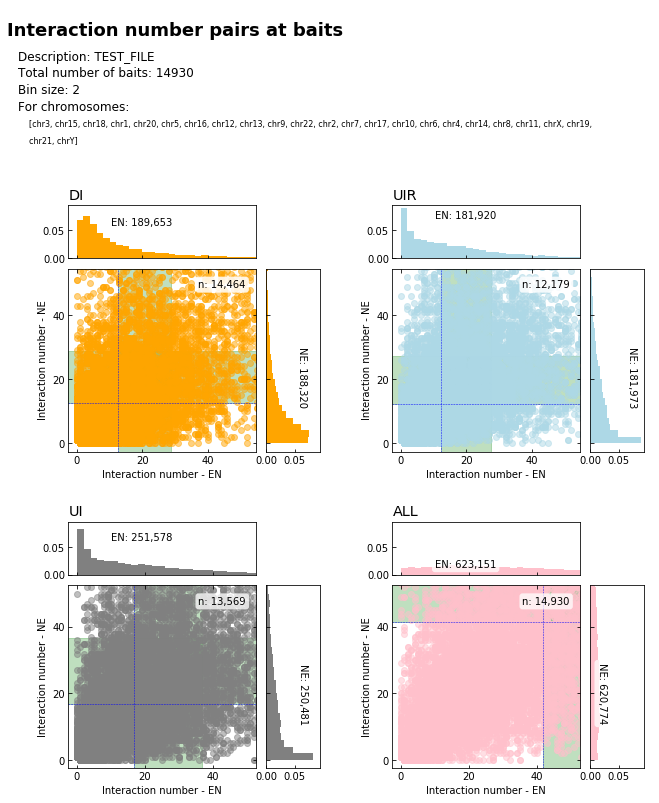

In [22]:
fig = baited_digest_set.get_pair_scatter_plots_with_histograms(
    pairs_dict = i_num_pair_dict,
    draw_mean_and_sd = True,
    set_xy_max = 50,
    sup_title = 'Interaction number pairs at baits',
    description = OUT_PREFIX,
    pdf_file_name = OUT_PREFIX + '_i_num_pairs_scatter_plots_with_histograms.pdf'
)

### Read pair number pairs

In [23]:
rp_num_pairs_dict = baited_digest_set.get_number_pairs_at_baits(
    number_pair_type='RP_NUM',
    #chromosomes=['chr22']
    verbose = True
)

[INFO] Determining pairs of read pair numbers (to the left and right) at baits ...
	[INFO] Processing chromosome chr3 ...
	[INFO] Processing chromosome chr15 ...
	[INFO] Processing chromosome chr18 ...
	[INFO] Processing chromosome chr1 ...
	[INFO] Processing chromosome chr20 ...
	[INFO] Processing chromosome chr5 ...
	[INFO] Processing chromosome chr16 ...
	[INFO] Processing chromosome chr12 ...
	[INFO] Processing chromosome chr13 ...
	[INFO] Processing chromosome chr9 ...
	[INFO] Processing chromosome chr22 ...
	[INFO] Processing chromosome chr2 ...
	[INFO] Processing chromosome chr7 ...
	[INFO] Processing chromosome chr17 ...
	[INFO] Processing chromosome chr10 ...
	[INFO] Processing chromosome chr6 ...
	[INFO] Processing chromosome chr4 ...
	[INFO] Processing chromosome chr14 ...
	[INFO] Processing chromosome chr8 ...
	[INFO] Processing chromosome chr11 ...
	[INFO] Processing chromosome chrX ...
	[INFO] Processing chromosome chr19 ...
	[INFO] Processing chromosome chr21 ...
	[INFO]

0.001151661166941653
0.0015248183522345352
0.0015965011223239413
0.00037816306605969097
0.0012165651483050848
0.001517146769724491
0.0016040426145838408
0.0003710110458978056
0.0016040426145838408


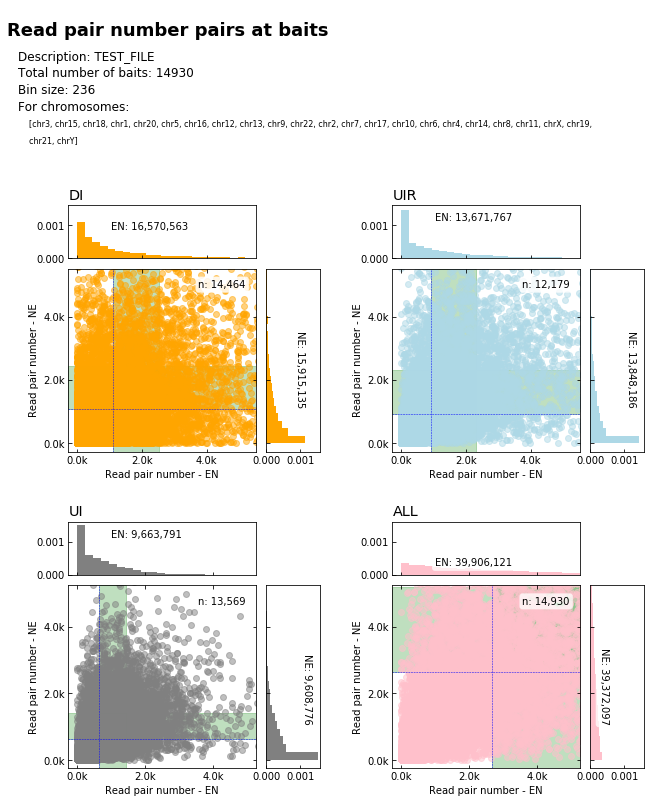

In [24]:
fig = baited_digest_set.get_pair_scatter_plots_with_histograms(
    pairs_dict = rp_num_pairs_dict,
    draw_mean_and_sd=True,
    set_xy_max = 5000,
    sup_title = 'Read pair number pairs at baits',
    description = OUT_PREFIX,
    pdf_file_name = OUT_PREFIX + '_rp_num_pairs_scatter_plots_with_histograms.pdf'
)

### Median read pair number pairs

In [25]:
med_rp_num_pairs_dict = baited_digest_set.get_number_pairs_at_baits(
    number_pair_type='MED_RP_NUM',
    #chromosomes=['chr22']
    verbose = True
)

[INFO] Determining pairs of median read pair numbers (to the left and right) at baits ...
	[INFO] Processing chromosome chr3 ...
	[INFO] Processing chromosome chr15 ...
	[INFO] Processing chromosome chr18 ...
	[INFO] Processing chromosome chr1 ...
	[INFO] Processing chromosome chr20 ...
	[INFO] Processing chromosome chr5 ...
	[INFO] Processing chromosome chr16 ...
	[INFO] Processing chromosome chr12 ...
	[INFO] Processing chromosome chr13 ...
	[INFO] Processing chromosome chr9 ...
	[INFO] Processing chromosome chr22 ...
	[INFO] Processing chromosome chr2 ...
	[INFO] Processing chromosome chr7 ...
	[INFO] Processing chromosome chr17 ...
	[INFO] Processing chromosome chr10 ...
	[INFO] Processing chromosome chr6 ...
	[INFO] Processing chromosome chr4 ...
	[INFO] Processing chromosome chr14 ...
	[INFO] Processing chromosome chr8 ...
	[INFO] Processing chromosome chr11 ...
	[INFO] Processing chromosome chrX ...
	[INFO] Processing chromosome chr19 ...
	[INFO] Processing chromosome chr21 ...


0.0172483407079646
0.021656950488545858
0.05100265310634535
0.037280977896851974
0.017451603982300886
0.02091551030462271
0.050979438425823566
0.03782953784326858
0.05100265310634535


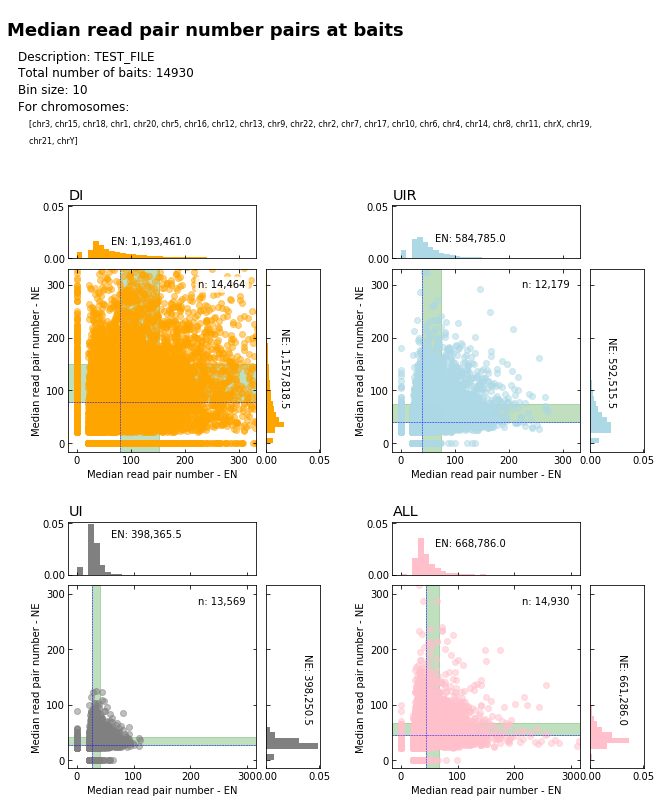

In [26]:
fig = baited_digest_set.get_pair_scatter_plots_with_histograms(
    pairs_dict = med_rp_num_pairs_dict,
    draw_mean_and_sd=True,
    set_xy_max = 300,
    sup_title = 'Median read pair number pairs at baits',
    description = OUT_PREFIX,
    pdf_file_name = OUT_PREFIX + '_med_rp_num_pairs_scatter_plots_with_histograms.pdf'
)

### Median distance pairs

In [27]:
med_i_dist_pair_dict = baited_digest_set.get_number_pairs_at_baits(
    number_pair_type='MED_I_DIST',
    #chromosomes=['chr22'],
    verbose = True
)

[INFO] Determining pairs of median interaction distances (to the left and right) at baits ...
	[INFO] Processing chromosome chr3 ...
	[INFO] Processing chromosome chr15 ...
	[INFO] Processing chromosome chr18 ...
	[INFO] Processing chromosome chr1 ...
	[INFO] Processing chromosome chr20 ...
	[INFO] Processing chromosome chr5 ...
	[INFO] Processing chromosome chr16 ...
	[INFO] Processing chromosome chr12 ...
	[INFO] Processing chromosome chr13 ...
	[INFO] Processing chromosome chr9 ...
	[INFO] Processing chromosome chr22 ...
	[INFO] Processing chromosome chr2 ...
	[INFO] Processing chromosome chr7 ...
	[INFO] Processing chromosome chr17 ...
	[INFO] Processing chromosome chr10 ...
	[INFO] Processing chromosome chr6 ...
	[INFO] Processing chromosome chr4 ...
	[INFO] Processing chromosome chr14 ...
	[INFO] Processing chromosome chr8 ...
	[INFO] Processing chromosome chr11 ...
	[INFO] Processing chromosome chrX ...
	[INFO] Processing chromosome chr19 ...
	[INFO] Processing chromosome chr21 

6.891890390836664e-06
3.9334244746226446e-06
2.9521286832430502e-06
4.277311209744978e-06
6.785585190497236e-06
4.1121419684675255e-06
3.002164762620051e-06
4.483285545673911e-06
6.891890390836664e-06


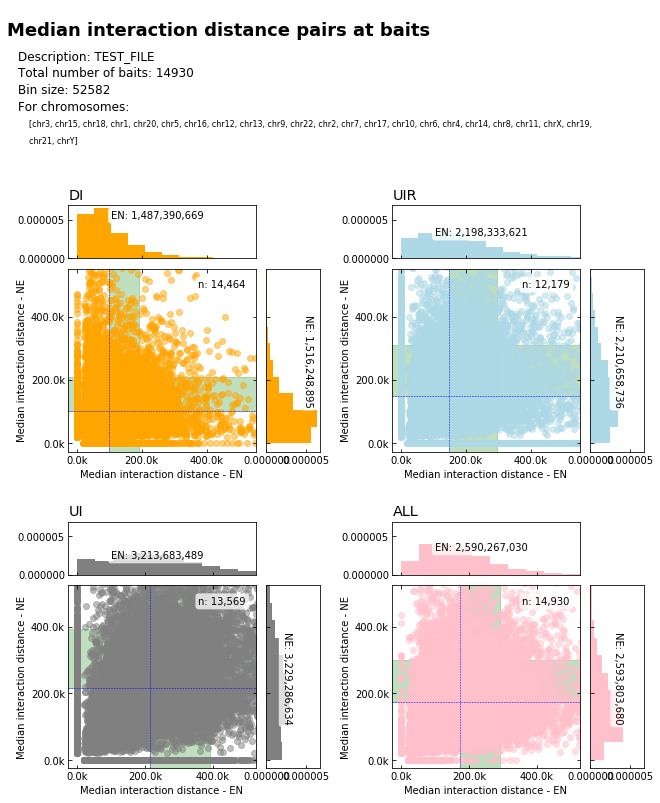

In [28]:
fig = baited_digest_set.get_pair_scatter_plots_with_histograms(
    pairs_dict = med_i_dist_pair_dict,
    draw_mean_and_sd=True,
    set_xy_max = 500000,
    sup_title = 'Median interaction distance pairs at baits',
    description = OUT_PREFIX,
    pdf_file_name = OUT_PREFIX + '_med_i_dist_pairs_scatter_plots_with_histograms.pdf'
)

### Digest lengths (provisionally)

Here, not `NE` and `EN` are compared, but the lengths of digest pairs of interactions. In this way, the framework with the `num_pair`  dictionary and the 2x2 grid of scatterplots can be used for a quick visulalization.

First, we reload the interactions because, above, we haad already filtered out interactions with extreme digest pairs.

In [ ]:
d11_interaction_set = DiachromaticInteractionSet()
d11_interaction_set.parse_file(i_file=INTERACTION_FILE, verbose=True)

#d11_interaction_set.remove_digest_length_outliers(dg_min_len = 500, dg_max_len = 10000, dg_min_len_q = 0.25, verbose =  True)
#d11_interaction_set.remove_digest_length_outliers(dg_min_len = 0, dg_max_len = 500, dg_min_len_q = 0.25, verbose =  True)

d11_interaction_set.shuffle_inter_dict(random_seed = 1, verbose = True)
report_dict = d11_interaction_set.select_reference_interactions_2(verbose=True)
baited_digest_set = BaitedDigestSet()
read_interactions_info_dict = baited_digest_set.ingest_interaction_set(d11_interaction_set, verbose=True)

[INFO] Parsing Diachromatic interaction file ...
	[INFO] ../DICer_interactions/HT/JAV_MK_RALT_20000_evaluated_and_categorized_interactions.tsv.gz
	[INFO] Parsed 1,000,000 interaction lines ...
	[INFO] Parsed 2,000,000 interaction lines ...
	[INFO] Parsed 3,000,000 interaction lines ...
	[INFO] Parsed 4,000,000 interaction lines ...


A new number pair type `DIG_LEN` has been added to function `get_number_pairs_at_baits`.

In [58]:
dig_len_pair_dict = baited_digest_set.get_number_pairs_at_baits(
    number_pair_type='DIG_LEN',
    verbose=True
)

[INFO] Determining pairs of digest lengths (to the left and right) at baits ...
	[INFO] Processing chromosome chr21 ...
	[INFO] Processing chromosome chr22 ...
[INFO] ... done.


The dictionary now contains pairs of digest lengths for each interaction in the various categories.

In [59]:
print(dig_len_pair_dict['DI']['NE'][0])
print(dig_len_pair_dict['DI']['EN'][0])

1080
4124


Now the medians of the lengths in the different categories can be easily calculated and compared.

In [60]:
from numpy import median, mean, quantile

print("Median of shorter digest lengths DI: " + str(median(dig_len_pair_dict['DI']['NE'])))
print("Median of longer digest lengths DI: " + str(median(dig_len_pair_dict['DI']['EN'])))
print()
print("Median of shorter digest lengths UIR: " + str(median(dig_len_pair_dict['UIR']['NE'])))
print("Median of longer digest lengths UIR: " + str(median(dig_len_pair_dict['UIR']['EN'])))
print()
print("Median of shorter digest lengths UI: " + str(median(dig_len_pair_dict['UI']['NE'])))
print("Median of longer digest lengths UI: " + str(median(dig_len_pair_dict['UI']['EN'])))
print()
print("Median of shorter digest lengths ALL: " + str(median(dig_len_pair_dict['ALL']['NE'])))
print("Median of longer digest lengths ALL: " + str(median(dig_len_pair_dict['ALL']['EN'])))

Median of shorter digest lengths DI: 2197.0
Median of longer digest lengths DI: 8514.0

Median of shorter digest lengths UIR: 2192.0
Median of longer digest lengths UIR: 7040.0

Median of shorter digest lengths UI: 2180.0
Median of longer digest lengths UI: 7284.0

Median of shorter digest lengths ALL: 2181.0
Median of longer digest lengths ALL: 7321.0


The quotients of the shorter and longer lengths can also be calculated and compared.

In [61]:
diq = []
for i in range(0,len(dig_len_pair_dict['DI']['NE'])):
    diq.append(dig_len_pair_dict['DI']['NE'][i]/dig_len_pair_dict['DI']['EN'][i])
print("Mean of quotiens of digest lengths DI: " + str(round(mean(diq),2)))
print("Quantiles of quotiens of digest lengths DI: " + str(quantile(diq, [0.25,0.50,0.75])))
print()
uirq = []
for i in range(0,len(dig_len_pair_dict['UIR']['NE'])):
    uirq.append(dig_len_pair_dict['UIR']['NE'][i]/dig_len_pair_dict['UIR']['EN'][i])
print("Mean of quotiens of digest lengths UIR: " + str(round(mean(uirq),2)))
print("Quantiles of quotiens of digest lengths UIR: " + str(quantile(uirq, [0.25,0.50,0.75])))
print()
uiq = []
for i in range(0,len(dig_len_pair_dict['UI']['NE'])):
    uiq.append(dig_len_pair_dict['UI']['NE'][i]/dig_len_pair_dict['UI']['EN'][i])
print("Mean of quotiens of digest lengths UI: " + str(round(mean(uiq),2)))
print("Quantiles of quotiens of digest lengths UI: " + str(quantile(uiq, [0.25,0.50,0.75])))
print()
allq = []
for i in range(0,len(dig_len_pair_dict['ALL']['NE'])):
    allq.append(dig_len_pair_dict['ALL']['NE'][i]/dig_len_pair_dict['ALL']['EN'][i])
print("Mean of quotiens of digest lengths ALL: " + str(round(mean(allq),2)))
print("Quantiles of quotiens of digest lengths ALL: " + str(quantile(allq, [0.25,0.50,0.75])))

Mean of quotiens of digest lengths DI: 0.34
Quantiles of quotiens of digest lengths DI: [0.08711721 0.27429184 0.55292872]

Mean of quotiens of digest lengths UIR: 0.39
Quantiles of quotiens of digest lengths UIR: [0.14898087 0.33410944 0.59297316]

Mean of quotiens of digest lengths UI: 0.39
Quantiles of quotiens of digest lengths UI: [0.14634146 0.32953466 0.59771454]

Mean of quotiens of digest lengths ALL: 0.38
Quantiles of quotiens of digest lengths ALL: [0.14404344 0.32709061 0.59556467]


Finally, the 2x2 grid with the scatterplots is created. We create the dictionary `dig_len_pair_dict` again for only one chromosome because otherwise the scatterplot would become too big.

[INFO] Determining pairs of digest lengths (to the left and right) at baits ...
	[INFO] Processing chromosome chr22 ...
[INFO] ... done.


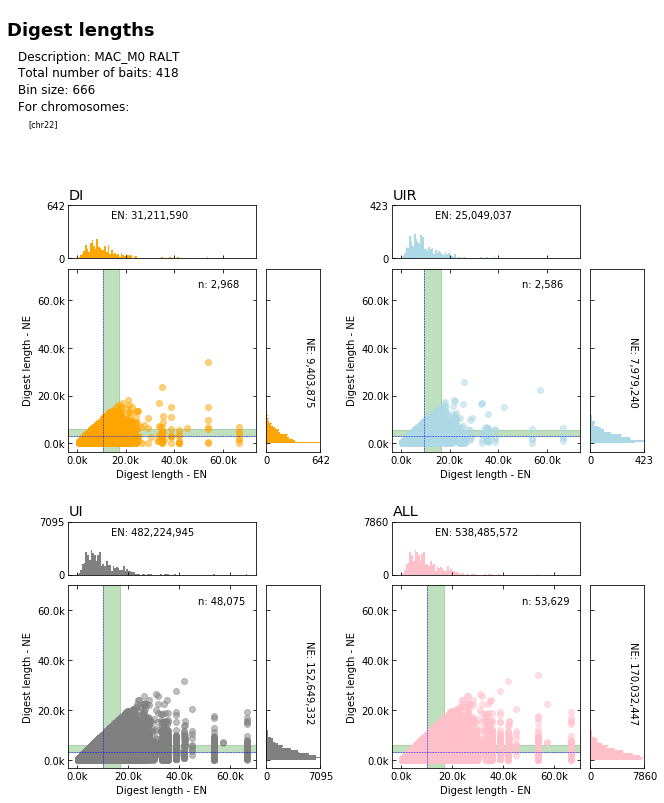

In [62]:
dig_len_pair_dict = baited_digest_set.get_number_pairs_at_baits(
    number_pair_type='DIG_LEN',
    chromosomes=['chr22'],
    verbose=True
)
fig = baited_digest_set.get_pair_scatter_plots_with_histograms(
    pairs_dict = dig_len_pair_dict,
    draw_mean_and_sd = True,
    #set_xy_max = 20000,
    sup_title = 'Digest lengths',
    description = 'MAC_M0 RALT',
    pdf_file_name ='MAC_M0_RALT_dig_len_pairs_scatter_plots_with_histograms.pdf'
)

To get an impression of the effects of filtering interactions with extreme digest pairs, repeat the analyzes from this section after uncommenting the relevant line (`remove_digest_length_outliers`) at the beginning.

## Proportion of directed interactions on individual chromosomes  (provisionally)

In [63]:
baited_digest_set.proportion_of_directed_interactions_on_individual_chromosomes()

262
chr21	52843	2093	0.04	0.05	0.48	0.47
418
chr22	53629	2968	0.06	0.05	0.51	0.51


## BaitedDigest key sorted by starting position (provisionally)

In [64]:
sorted_baited_digest_keys = baited_digest_set.get_baited_digest_keys_sorted_by_sta_pos()
for i in sorted_baited_digest_keys['chr22']:
    print(i)

chr22	16818640	16825948
chr22	17004466	17011585
chr22	17078723	17092243
chr22	17116729	17122470
chr22	17158523	17165407
chr22	17247624	17269016
chr22	17358660	17367331
chr22	17625009	17633327
chr22	17771846	17783296
chr22	17976670	17982933
chr22	18021792	18025855
chr22	18076869	18090126
chr22	18107010	18112573
chr22	18145621	18150468
chr22	19111150	19132339
chr22	19141629	19145046
chr22	19146350	19158547
chr22	19175210	19181611
chr22	19290242	19296281
chr22	19427912	19434092
chr22	19434093	19449912
chr22	19472999	19485346
chr22	19526639	19531205
chr22	19704203	19722313
chr22	19722314	19741175
chr22	19756458	19757522
chr22	19940745	19950116
chr22	20003784	20020920
chr22	20029363	20033885
chr22	20083394	20096034
chr22	20111600	20116672
chr22	20116673	20118239
chr22	20124106	20138526
chr22	20181708	20211956
chr22	20246695	20258491
chr22	20262801	20283292
chr22	20388957	20403343
chr22	20412904	20424609
chr22	20434852	20440860
chr22	20494762	20504036
chr22	20520286	20537480
chr22	20720187	2